## Introduction
<font color="yellow">
Data science is an excellent way to predict Bitcoin’s future in high accurate by inspecting the old trends and patterns. Looking at the past data of the bitcoin can lead us to high accurate predictions about where bitcoin will head in the future. These high accurate predictions might lead us to make good profitable decision in the Bitcoin market. In our project, we will use of different datasets in order to analyze bitcoin which will allow us to make high accurate predictions about the bitcoin market.
<font/>

# Utilized Datasets
In step 1, we used the BTC-USD data set from kaggle.com. 
The contents of this dataset include: 

Date, opening, high and low of the days, close price, and trade volume are among the features in the dataset, which spans the last eight years.

Then, we obtained new data by calculating the market cap, changes in the opening and closing, BTC volume and Total Supply based on these data and graphed them.

Data could be retrieved from: https://www.kaggle.com/datasets/surajjha101/analyzing-and-prediction-of-bitcoin-pricing 

In [ ]:
!pip install reverse_geocoder
!pip install geopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import reverse_geocoder as rg
from geopy.distance import geodesic
from scipy import stats
import seaborn as sns
from os.path import join
from os import listdir


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

## Downloading Data to the Google Cloud
We've uploaded our data to Google Cloud Storage, where anyone may download and try out our notebook!

In [ ]:
from google.colab import drive
drive.mount('./drive', force_remount=True)

path_prefix = './drive/My Drive'

Mounted at ./drive


#Exploratory Data Analysis

In this part, we are reading our main data set, BTC-USD data set.

In [ ]:
#READ IN THE DATASET
filename = "BTC-USD.csv"
df = pd.read_csv(join(path_prefix, filename))
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...,...
2750,2022-03-29,47100.437500,48022.289063,47100.437500,47465.730469,47465.730469,31397059069
2751,2022-03-30,47456.898438,47655.148438,46746.210938,47062.664063,47062.664063,29333883962
2752,2022-03-31,47062.148438,47512.027344,45390.539063,45538.675781,45538.675781,33327427106
2753,2022-04-01,45554.164063,46616.242188,44403.140625,46281.644531,46281.644531,38162644287


In [ ]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

We added "diffhl" feature to compare the high and low values.

In [ ]:
df['diffhl'] = (df['High'] - df['Low'])

We added "diffoc" feature to compare the opening and closing values.


In [ ]:
df['diffoc'] = (df['Open']-df['Close'])

to visualize price trends based on time series and volume we added "average" feature.

In [ ]:
df['average'] = (df['High'] + df['Low'])/2


**<font color="openblue">
Visualize each feature separately based on time series
<font/>**

### **Open** **vs** **Date**

Around 2020-2021, the values of open, close, high and low increased significantly.  
The plots below are all the same. Since all plots have the same shape, we can infer that they are correlated.

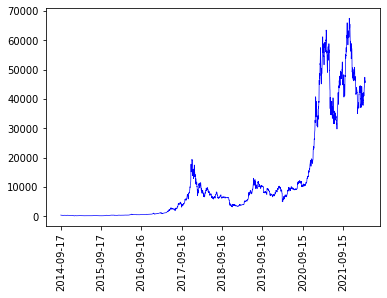

In [ ]:
x_values = df['Date']
y_values = df['Open']
plt.plot(x_values, y_values,color="blue",linestyle="-",marker="", linewidth = 0.7)
plt.xticks(x_values[::365], rotation = 'vertical')
plt.show()

### **Close vs Date**

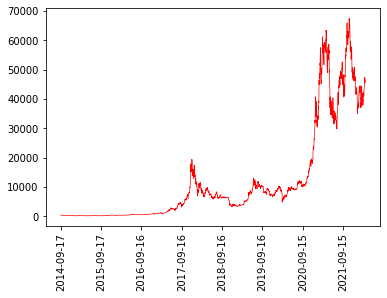

In [ ]:
x_values = df['Date']
y_values = df['Close']
plt.plot(x_values, y_values,color="red",linestyle="-",marker="", linewidth = 0.7)
plt.xticks(x_values[::365], rotation = 'vertical')
plt.show()

### **High vs Date**

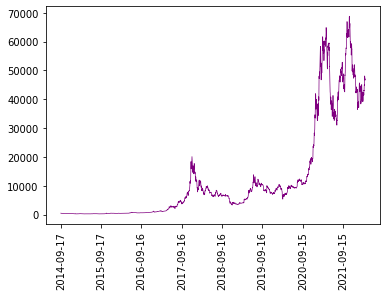

In [ ]:
x_values = df['Date']
y_values = df['High']
plt.plot(x_values, y_values,color="purple",linestyle="-",marker="", linewidth = 0.7)
plt.xticks(x_values[::365], rotation = 'vertical')
plt.show()

### **Low vs Date**

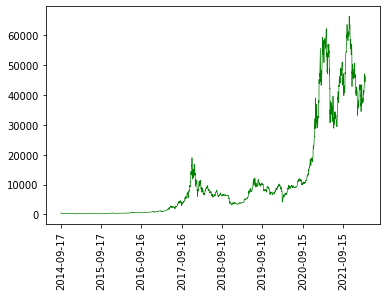

In [ ]:
x_values = df['Date']
y_values = df['Low']
plt.plot(x_values, y_values,color="green",linestyle="-",marker="", linewidth = 0.7)
plt.xticks(x_values[::365], rotation = 'vertical')
plt.show()

### **Adj Close vs Date**

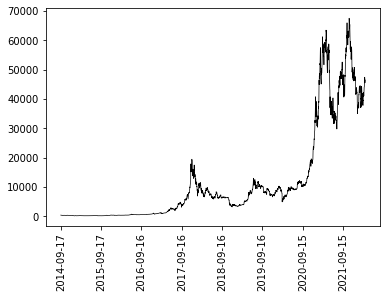

In [ ]:
x_values = df['Date']
y_values = df['Adj Close']
plt.plot(x_values, y_values,color="black",linestyle="-",marker="", linewidth = 0.7)
plt.xticks(x_values[::365], rotation = 'vertical')
plt.show()

**<font color="openblue">
Visualize each feature separately based on time series
<font/>**

The histograms below indicate distributions of each numerical variable in our dataset.

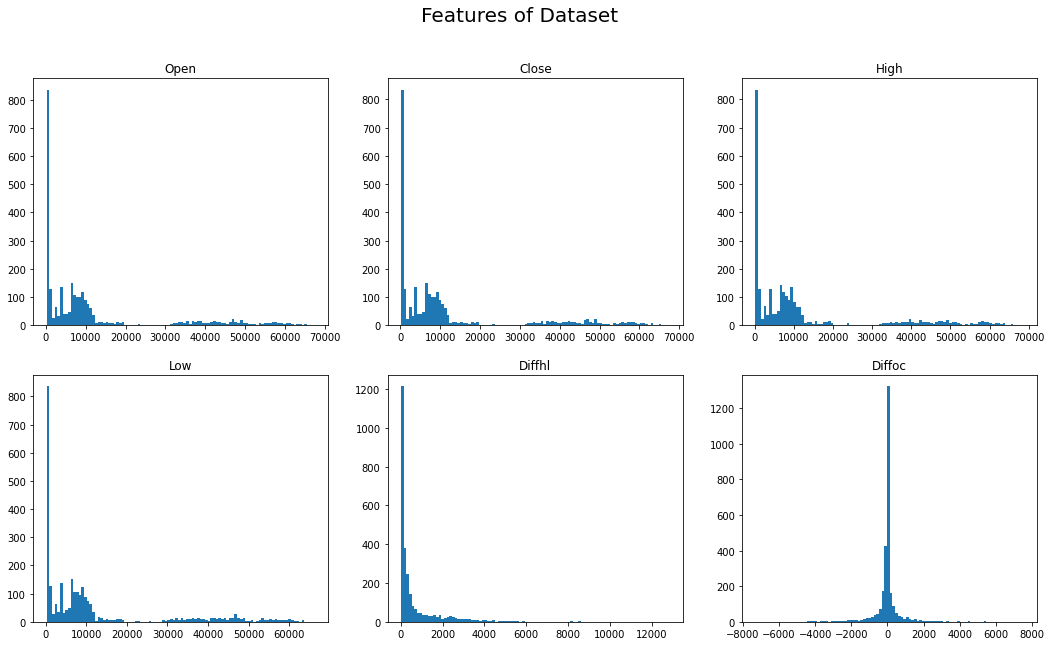

In [ ]:
Open = df["Open"]
Close = df["Close"]
High = df["High"]
Low = df["Low"]
Diffhl = df["diffhl"]
Diffoc = df["diffoc"]
Date = df["Date"]


n_bins = 100

fig, ax = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Features of Dataset', fontsize=20)
#Rank	Year	Runtime (Minutes)	Rating	Votes	Revenue (Millions)	Metascore	imdbID	movieLensID

ax[0][0].hist(Open, n_bins)
ax[0][0].set_title("Open")
ax[0][1].hist(Close, n_bins)
ax[0][1].set_title("Close")
ax[0][2].hist(High, n_bins)
ax[0][2].set_title("High")
ax[1][0].hist(Low, n_bins)
ax[1][0].set_title("Low")
ax[1][1].hist(Diffhl, n_bins)
ax[1][1].set_title("Diffhl")
ax[1][2].hist(Diffoc, n_bins)
ax[1][2].set_title("Diffoc")



plt.show()

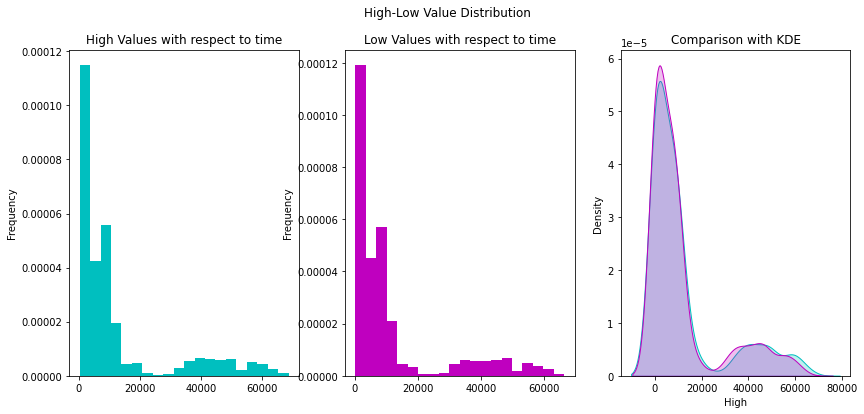

In [ ]:
import math
Open_value = df['High']
Close_value = df['Low']   

fig, ax = plt.subplots(1, 3, figsize=(14,6))  # a figure with 1 row and 3 columns
                                              # ax variable stores a list with 3 elements
                                              # each element in ax correspons to chart
        
Open_value.plot(kind="hist", ax=ax[0], bins=20, label="High Values", color="c", density=True)
ax[0].set_title("High Values with respect to time")

Close_value.plot(kind="hist", ax=ax[1], bins=20, label="Low Values", color="m", density=True)
ax[1].set_title("Low Values with respect to time")

sns.kdeplot(Open_value, shade=True, label="High values", ax=ax[2], color="c")
sns.kdeplot(Close_value, shade=True, label="Low Values with respect to time", ax=ax[2], color="m")
ax[2].set_title("Comparison with KDE")

plt.suptitle("High-Low Value Distribution")
plt.show()

In [ ]:
filename = "btc_data_bi_day.csv"
df2 = pd.read_csv(join(path_prefix, filename))
df2

,date,open,high,low,close,volume,close time,quote asset volume,number of trades,taker buy base asset,taker buy quote asset volume,ignore
0,2017-08-17,4261.48,4485.39,4200.74,4285.08,795.150377,1503014399999,3.454770e+06,3427,616.248541,2.678216e+06,8733.911395
1,2017-08-18,4285.08,4371.52,3938.77,4108.37,1199.888264,1503100799999,5.086958e+06,5233,972.868710,4.129123e+06,9384.141409
2,2017-08-19,4108.37,4184.69,3850.00,4139.98,381.309763,1503187199999,1.549484e+06,2153,274.336042,1.118002e+06,9184.085529
3,2017-08-20,4120.98,4211.08,4032.62,4086.29,467.083022,1503273599999,1.930364e+06,2321,376.795947,1.557401e+06,10125.414084
4,2017-08-21,4069.13,4119.62,3911.79,4016.00,691.743060,1503359999999,2.797232e+06,3972,557.356107,2.255663e+06,11706.769970
...,...,...,...,...,...,...,...,...,...,...,...,...
1426,2021-07-13,33086.94,33340.00,32202.25,32729.77,41126.361008,1626220799999,1.348583e+09,956053,19588.278507,6.425767e+08,0.000000
1427,2021-07-14,32729.12,33114.03,31550.00,32820.02,46777.823484,1626307199999,1.515692e+09,1123129,22516.485719,7.300091e+08,0.000000
1428,2021-07-15,32820.03,33185.25,31133.00,31880.00,51639.576353,1626393599999,1.652078e+09,1099367,24866.405787,7.958310e+08,0.000000
1429,2021-07-16,31874.49,32249.18,31020.00,31383.87,48499.864154,1626479999999,1.538343e+09,1067591,23963.744568,7.602747e+08,0.000000


In [ ]:
df2.dtypes

date                             object
open                            float64
high                            float64
low                             float64
close                           float64
volume                          float64
close time                        int64
quote asset volume              float64
number of trades                  int64
taker buy base asset            float64
taker buy quote asset volume    float64
ignore                          float64
dtype: object

In [ ]:
from datetime import datetime
df2['date'] = pd.to_datetime(df2['date'])
df2["date"] = df2["date"].dt.strftime("%Y-%m-%d")
df = pd.merge(df,df2[["date", "number of trades"]] , left_on= 'Date' , right_on = 'date', how='left' )
df = df.dropna(how ="any", axis="index")

In [ ]:
df.drop('date',1)

,Date,Open,High,Low,Close,Adj Close,Volume,diffhl,diffoc,average,number of trades
1065,2017-08-17,4384.439941,4484.700195,4243.709961,4331.689941,4331.689941,2553359872,240.990234,52.750000,4364.205078,3427.0
1066,2017-08-18,4324.339844,4370.129883,4015.399902,4160.620117,4160.620117,2941710080,354.729981,163.719727,4192.764892,5233.0
1067,2017-08-19,4137.750000,4243.259766,3970.550049,4193.700195,4193.700195,2975820032,272.709717,-55.950195,4106.904908,2153.0
1068,2017-08-20,4189.310059,4196.290039,4069.879883,4087.659912,4087.659912,2109769984,126.410156,101.650147,4133.084961,2321.0
1069,2017-08-21,4090.479980,4109.140137,3988.600098,4001.739990,4001.739990,2800890112,120.540039,88.739990,4048.870118,3972.0
...,...,...,...,...,...,...,...,...,...,...,...
2491,2021-07-13,33125.468750,33327.101563,32261.419922,32702.025391,32702.025391,19120856669,1065.681641,423.443359,32794.260743,956053.0
2492,2021-07-14,32723.845703,33061.398438,31639.125000,32822.347656,32822.347656,21376531210,1422.273438,-98.501953,32350.261719,1123129.0
2493,2021-07-15,32827.875000,33159.640625,31175.708984,31780.730469,31780.730469,21300524237,1983.931641,1047.144531,32167.674804,1099367.0
2494,2021-07-16,31841.550781,32218.406250,31100.673828,31421.539063,31421.539063,23699476918,1117.732422,420.011718,31659.540039,1067591.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
# add a column for Year
df['Year'] = df['Date'].dt.year

In [ ]:
df_2017 = df[df['Year'] == 2017]


In [ ]:
df_2017['Date'] = pd.to_datetime(df_2017['Date'])
# add a column for Year
df_2017['Month'] = df_2017['Date'].dt.month

In [ ]:
df_2017

,Date,Open,High,Low,Close,Adj Close,Volume,diffhl,diffoc,average,date,number of trades,Date+1,Year,Month
1065,2017-08-17,4384.439941,4484.700195,4243.709961,4331.689941,4331.689941,2553359872,240.990234,52.750000,4364.205078,2017-08-17,3427.0,2017-08-17,2017,8
1066,2017-08-18,4324.339844,4370.129883,4015.399902,4160.620117,4160.620117,2941710080,354.729981,163.719727,4192.764892,2017-08-18,5233.0,2017-08-18,2017,8
1067,2017-08-19,4137.750000,4243.259766,3970.550049,4193.700195,4193.700195,2975820032,272.709717,-55.950195,4106.904908,2017-08-19,2153.0,2017-08-19,2017,8
1068,2017-08-20,4189.310059,4196.290039,4069.879883,4087.659912,4087.659912,2109769984,126.410156,101.650147,4133.084961,2017-08-20,2321.0,2017-08-20,2017,8
1069,2017-08-21,4090.479980,4109.140137,3988.600098,4001.739990,4001.739990,2800890112,120.540039,88.739990,4048.870118,2017-08-21,3972.0,2017-08-21,2017,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1197,2017-12-27,16163.500000,16930.900391,15114.299805,15838.500000,15838.500000,12487600128,1816.600586,325.000000,16022.600098,2017-12-27,142202.0,2017-12-27,2017,12
1198,2017-12-28,15864.099609,15888.400391,13937.299805,14606.500000,14606.500000,12336499712,1951.100586,1257.599609,14912.850098,2017-12-28,178032.0,2017-12-28,2017,12
1199,2017-12-29,14695.799805,15279.000000,14307.000000,14656.200195,14656.200195,13025500160,972.000000,39.599610,14793.000000,2017-12-29,142100.0,2017-12-29,2017,12
1200,2017-12-30,14681.900391,14681.900391,12350.099609,12952.200195,12952.200195,14452599808,2331.800782,1729.700196,13516.000000,2017-12-30,190204.0,2017-12-30,2017,12


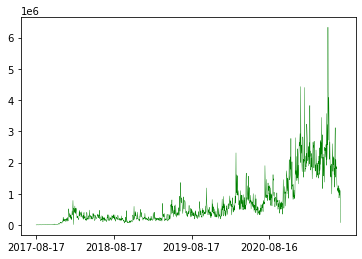

In [ ]:
x_values = df['Date']
y_values = df['number of trades']
plt.plot(x_values, y_values,color="green",linestyle="-",marker="", linewidth = 0.4)
plt.xticks(x_values[::365], rotation = 'horizontal')
plt.show()

# **Statistical Analysis & Hypothesis Testing**

In [ ]:
df['number of trades'].mean()

669601.6827393431

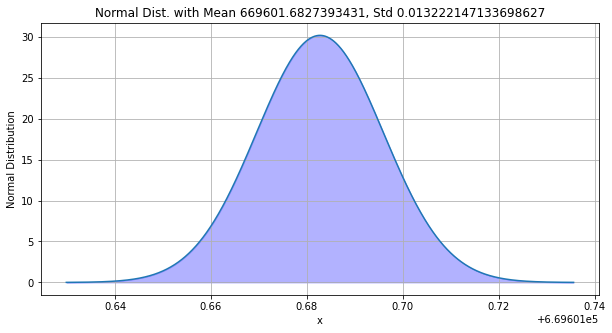

In [ ]:
# mean and std values from the sample
n = 1430
mean = df['number of trades'].mean()
std = 0.5 / np.sqrt(n)
offset = 4*std

# the x-axis ticks of the plot
# generates 100 equally separated ticks
x = np.linspace(mean - offset, mean + offset, n)

# probability density function
# of the given normal dist.
y = stats.norm.pdf(x, mean, std)

plt.figure(figsize=(10, 5))
plt.plot(x,y)
# put grids on the figure
plt.grid()
plt.xlabel("x")
plt.ylabel("Normal Distribution")
plt.fill_between(x, y, alpha=0.3, color="b")
plt.title(f"Normal Dist. with Mean {mean}, Std {std}")
plt.show()

Statistical tests on selected features (e.g. investigate whether there exist significant statistical differences between high and low prices with respect to open and close prices of the same day)
